# Testing notebook

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, f_oneway, mannwhitneyu

In [33]:
# Load the datasets

titanic_df = pd.read_csv('./data/titanic.csv')
cities_df = pd.read_csv('./data/california_cities.csv')
inmo_df = pd.read_csv('./data/ejemplo_housing.csv')
flights_df = pd.read_csv('./data/dataset_viajes_jun23.csv')
customers_df = pd.read_csv('./data/Marketing-Customer-Analysis.csv')

# Load functions

import toolbox_ML as tb
import toolbox_ML_extra as tbe

### describe_df()

In [3]:
tb.describe_df(inmo_df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,844,861,52,5911,1923,3879,1809,12825,3833,5
CARDIN (%),4.13,4.21,0.25,28.93,9.41,18.98,8.85,62.77,18.76,0.02


In [22]:
tb.describe_df('test')

TypeError: Input must be a pandas DataFrame, but received str.

In [35]:
tbe.describe_df_extra(inmo_df, count = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
NOT-NULL COUNT,20433,20433,20433,20433,20433,20433,20433,20433,20433,20433
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,844,861,52,5911,1923,3879,1809,12825,3833,5
CARDIN (%),4.13,4.21,0.25,28.93,9.41,18.98,8.85,62.77,18.76,0.02


### tipifica_variable()

In [4]:
tb.tipifica_variables(flights_df, 5, 40)

,nombre_variable,tipo_sugerido
0,aircompany,Numerica Discreta
1,origen,Numerica Discreta
2,destino,Numerica Discreta
3,distancia,Numerica Discreta
4,avion,Categorica
5,con_escala,Binaria
6,consumo_kg,Numerica Continua
7,duracion,Numerica Discreta
8,ingresos,Numerica Continua
9,id_vuelo,Numerica Continua


In [23]:
tb.tipifica_variables(flights_df, '5', 40)

TypeError: Parameter umbral_categoria must be int, but received str.

In [37]:
tbe.tipifica_variables_extra(flights_df, 5, 40, show_cardinality = True, show_percentage = True)

,nombre_variable,cardinalidad,%_cardinalidad,tipo_sugerido
0,aircompany,5,0.83,Numerica Discreta
1,origen,11,1.83,Numerica Discreta
2,destino,11,1.83,Numerica Discreta
3,distancia,45,7.50,Numerica Discreta
4,avion,4,0.67,Categorica
5,con_escala,2,0.33,Binaria
6,consumo_kg,501,83.50,Numerica Continua
7,duracion,113,18.83,Numerica Discreta
8,ingresos,600,100.00,Numerica Continua
9,id_vuelo,347,57.83,Numerica Continua


### get_features_num_regression()

In [39]:
tb.get_features_num_regression(inmo_df, 'median_house_value', 0.1, pvalue = 0.05)

['housing_median_age', 'latitude', 'median_income', 'total_rooms']

In [40]:
tb.get_features_num_regression(inmo_df, 'median_house_value', 0.3, pvalue = 0.05)

['median_income']

In [45]:
nr = tbe.get_features_num_regression_extra(inmo_df, 'median_house_value', 0.1, pvalue = 0.05, return_values = True)
print(nr[0])
nr[1]

['housing_median_age', 'latitude', 'median_income', 'total_rooms']


,corr,p_value
median_income,0.688355,0.000000e+00
total_rooms,0.133294,1.221172e-81
housing_median_age,0.106432,1.496134e-52
latitude,-0.144638,6.132893e-96


### plot_features_num_regression()

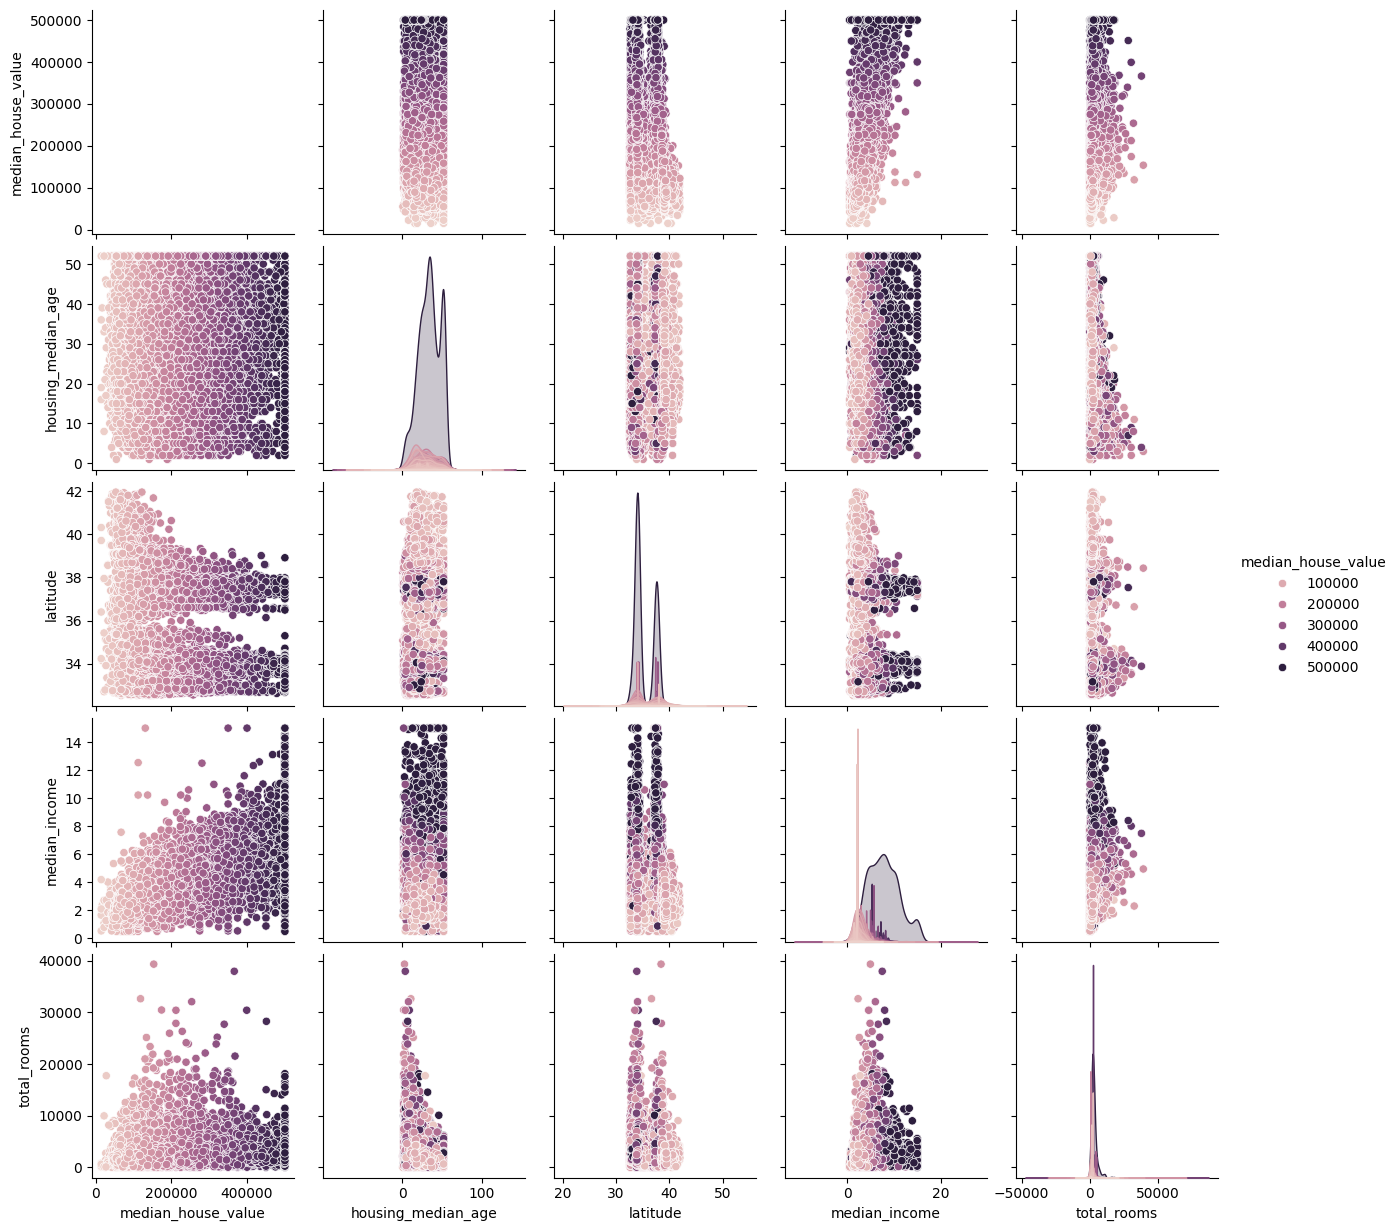

['housing_median_age', 'latitude', 'median_income', 'total_rooms']

In [6]:
# Test scenario 1: no columns specified
tb.plot_features_num_regression(inmo_df, target_col = "median_house_value", columns=[], umbral_corr=0.1, pvalue=0.95)

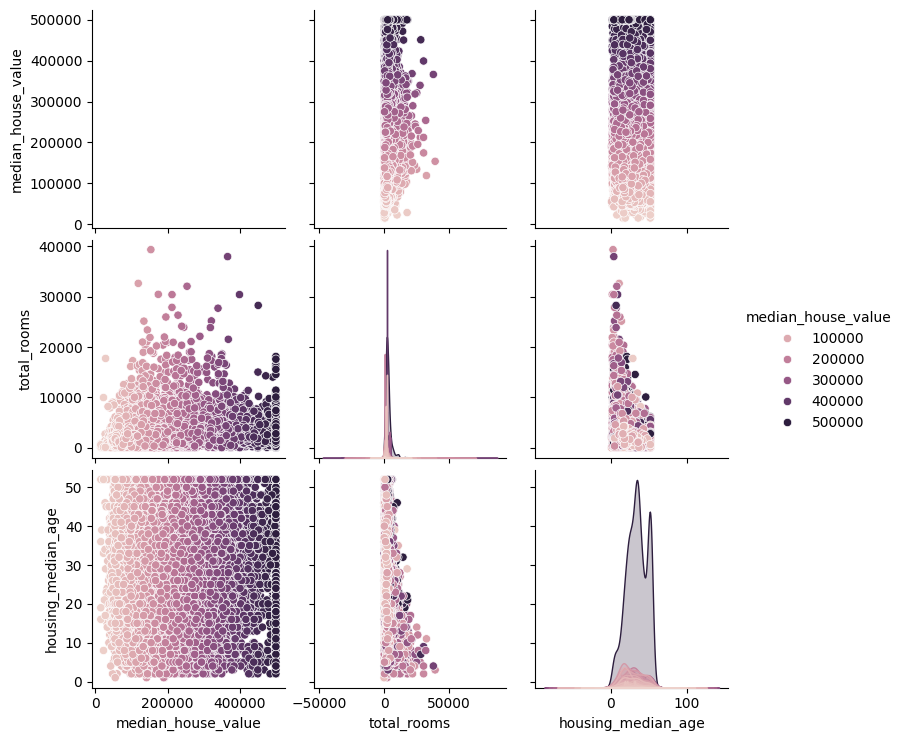

['total_rooms', 'housing_median_age']

In [7]:
# Test scenario 2: columns specified but some do not meet specified thresholds
tb.plot_features_num_regression(inmo_df, target_col = 'median_house_value', columns = ['total_bedrooms','total_rooms','population','housing_median_age'], umbral_corr = 0.1, pvalue = 0.95)

In [8]:
# test scenario 3: columns specified but none meet thresholds
tb.plot_features_num_regression(inmo_df, target_col = "median_house_value", columns = ['total_bedrooms','population'], umbral_corr=0.1, pvalue=0.95)

No columns meet the correlation and p-value criteria.


[]

### get_features_cat_regression()

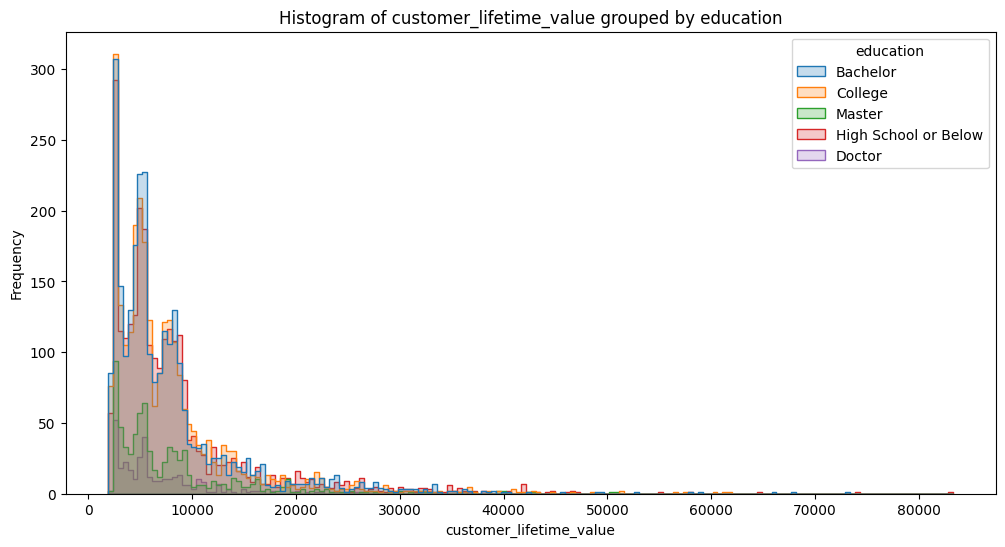

['education']

In [17]:
tb.plot_features_cat_regression(customers_df, target_col = 'customer_lifetime_value', columns = ['education'], with_individual_plot = True)

In [29]:
tb.describe_df(customers_df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
DATA_TYPE,object,object,float64,object,object,object,object,object,object,int64,...,int64,int64,int64,object,object,object,object,float64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,9134,5,8041,2,3,5,59,5,2,5694,...,100,6,9,3,9,4,4,5106,6,3
CARDIN (%),100.0,0.05,88.03,0.02,0.03,0.05,0.65,0.05,0.02,62.34,...,1.09,0.07,0.1,0.03,0.1,0.04,0.04,55.9,0.07,0.03


'response' did not meet the p-value significance level of 0.05.


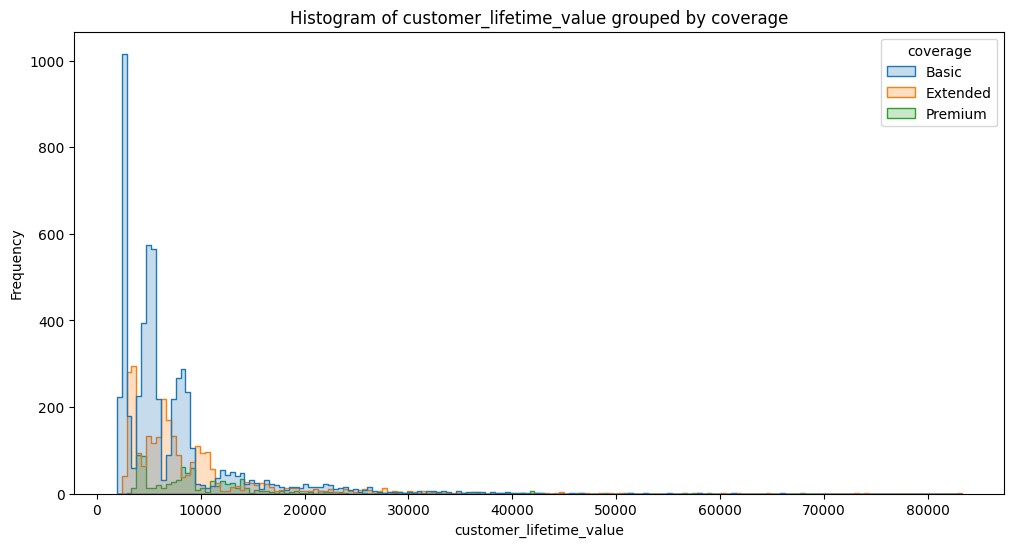

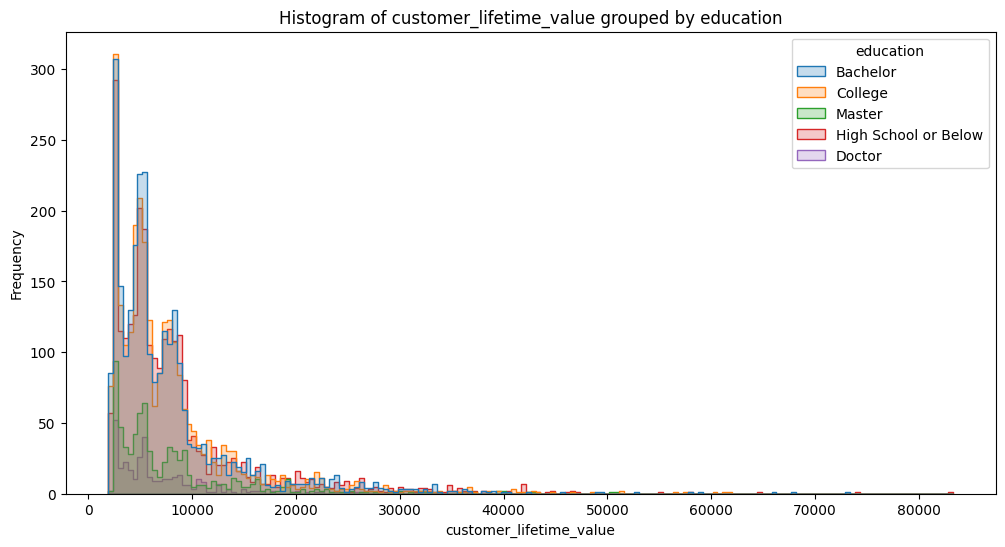

['coverage', 'education']

In [31]:
tb.plot_features_cat_regression(customers_df, target_col = 'customer_lifetime_value', columns = ['response', 'coverage', 'education'], with_individual_plot = True)

'response' did not meet the p-value significance level of 0.05.


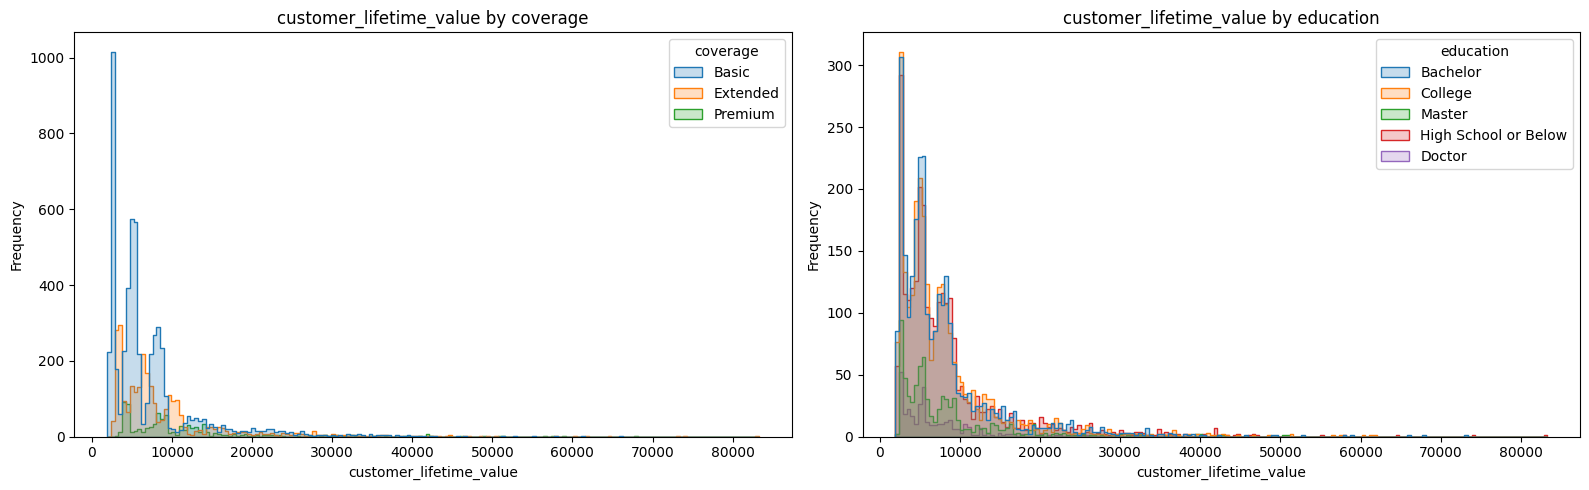

['coverage', 'education']

In [32]:
tb.plot_features_cat_regression(customers_df, target_col = 'customer_lifetime_value', columns = ['response', 'coverage', 'education'])